<img src='ASDC_logo.jfif' align='left' width='130'>
 <h1>   ASDC Internship</h1>
 <h2> Task 1 : Customer Segmentation </h2>

In [1]:
# Importing important libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing & Assigning the data to a variable called Customers

URL='https://raw.githubusercontent.com/ELSOUDY2030/Mall-Customers/main/Mall_Customers.csv'
customers=pd.read_csv(URL,sep=',')

# OR we can download the data and activate the below line of code
#customers=pd.read_csv('Mall_Customers.csv')

In [3]:
# Reading Data

customers

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
# Explore Information about data (Count of rows and Columns , null in every column , data type of columns)
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
# Explore some statistics about the data

customers.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
print(f'The total spending score of females is: {sum(customers["Spending Score (1-100)"][customers.Gender=="Female"])}')

The total spending score of females is: 5771


In [7]:
print(f'The total spending score of males is: {sum(customers["Spending Score (1-100)"][customers.Gender=="Male"])}')

The total spending score of males is: 4269


In [8]:
# It's Obvious that the total spending score of females are higher than Males (5771 for females , 4269 for males)

In [9]:
customers.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [10]:
customers.groupby('Gender').mean()[['Annual Income (k$)','Spending Score (1-100)']]

,Annual Income (k$),Spending Score (1-100)
Gender,,
Female,59.250000,51.526786
Male,62.227273,48.511364


In [11]:
# It was Obvious that the total spending score of females are higher than Males (5771 for females , 4269 for males)
    # After take into consideration the percentaage of females to males (112 female , 88 male)
    # There average spending score semi equal to each other (51.5 for females , 48.5 for males)
    # Females spend more than males despite thier lower annual income than males


In [12]:
# Feature Selection and asigning to new variable (to keep original data without changes)
features= customers[['Age','Annual Income (k$)','Spending Score (1-100)']]

In [13]:
features.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [14]:
# Importing Clustering Algorithm

from sklearn.cluster import KMeans

In [15]:
# Creating elbow plot to define the optimal number of clusters
sse = []
for i in range(1,10):
    km = KMeans(n_clusters=i)
    km.fit(features)
    sse.append(km.inertia_)

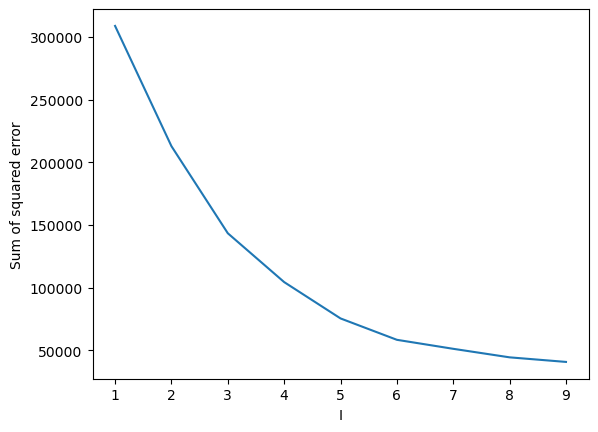

In [16]:
# Displaying elbow plot
plt.xlabel('I')
plt.ylabel('Sum of squared error')
plt.plot(range(1,10),sse)

In [17]:
# from elbow plot let's try 6 clusters
km = KMeans(n_clusters=6)
predicted_cluster=km.fit_predict(features)

In [18]:
predicted_cluster

array([5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4,
       5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 1, 4, 1, 0,
       5, 4, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 3, 0, 3, 2, 3, 2, 3, 2, 3,
       0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

In [19]:
# Adding predicted clusters as a column in the data
features['Cluster']=predicted_cluster

In [20]:
features.head()

,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,19,15,39,5
1,21,15,81,4
2,20,16,6,5
3,23,16,77,4
4,31,17,40,5


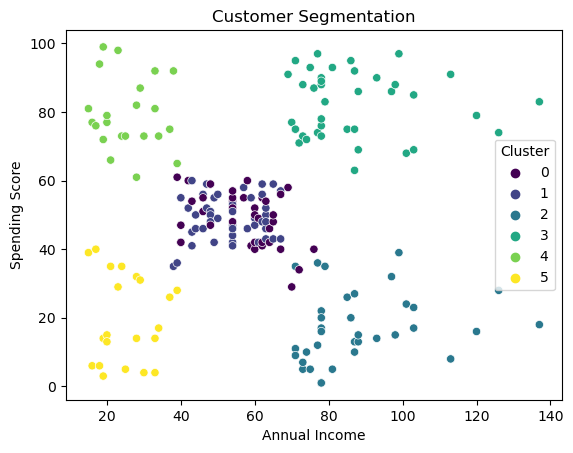

In [21]:
# Display the clusters
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=features,palette='viridis')
plt.title('Customer Segmentation')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [22]:
# There are alot of interaction between Cluster 5 and Cluster 0
# Let's try another number of clusters

In [23]:
# Let's assume it 5 Clusters
km = KMeans(n_clusters=5)
predicted_cluster=km.fit_predict(features)
features['Cluster']=predicted_cluster

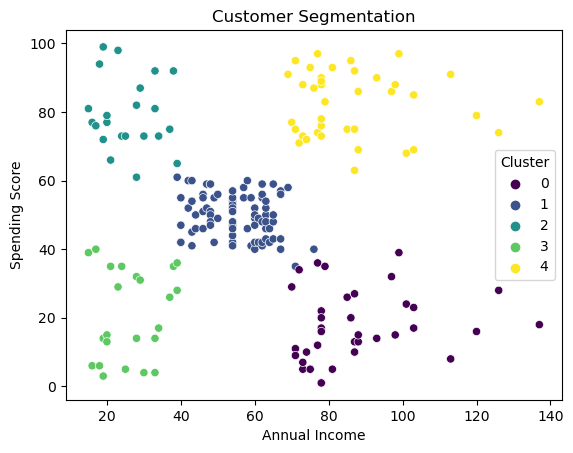

In [24]:
# Display the clusters
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=features,palette='viridis')
plt.title('Customer Segmentation')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()